In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import numpy as np
import tensorflow as tf
import strawberryfields as sf
from strawberryfields.ops import *
import pickle
import random as rd
import matplotlib.pyplot as plt
import warnings
import uncertainty_toolbox as uct

from collections.abc import Callable

from uq_new import *

tf.get_logger().setLevel('ERROR')
warnings.filterwarnings("ignore")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
rd.seed(42)

In [ ]:
X_train, y_train, X_test, y_test, _ = get_data(n_data=100, sigma_noise_1=0.1, datafunction=quartic_data)

# Train the memristor model
res_mem, phase1, phase3, memristor_weight = train_memristor(X_train, y_train, memory_depth=3)

# Save training results
with open("results_mem_t_lag_iris.pkl", "wb") as file:
    pickle.dump(res_mem, file)




Loss at step 1: 20.575533921190218
Loss at step 2: 19.170807438522566
Loss at step 3: 17.456305905916103
Loss at step 4: 15.911712890654211
Loss at step 5: 14.526958154491876
Loss at step 6: 13.078432838788746
Loss at step 7: 11.59955221026623
Loss at step 8: 10.124839533328146
Loss at step 9: 8.688499415004477
Loss at step 10: 7.322761241785778
Loss at step 11: 6.056117730494083
Loss at step 12: 4.911863309065995
Loss at step 13: 3.906765101319172
Loss at step 14: 3.050210482186277
Loss at step 15: 2.3442685212163736
Loss at step 16: 1.7842322143586786
Loss at step 17: 1.3597800892856435
Loss at step 18: 1.0564522480252985
Loss at step 19: 0.8557460997443936
Loss at step 20: 0.7327573212015595
Loss at step 21: 0.6698228367769434
Loss at step 22: 0.6515882302338083
Loss at step 23: 0.6654980664660355
Loss at step 24: 0.7018326694003396
Loss at step 25: 0.7531690296088831
Loss at step 26: 0.8134888254036038
Loss at step 27: 0.8774596702871188
Loss at step 28: 0.9399023074066382
Loss at 

In [6]:
# Predict using the trained model
predictions, targets, predictive_uncertainty = predict_memristor(
    X_test, y_test, memory_depth=3, phase1=phase1, phase3=phase3, memristor_weight=memristor_weight,
    stochastic=True, var=0.1, samples=100
)

#TODO: More samples less wiggle? 
#TODO: Change depth of mem depth with steady samples.

# Ensure predictions and X_test have the same length
assert len(predictions) == len(X_test), "Predictions and X_test must have the same length"

# Convert predictions, targets, and predictive_uncertainty to NumPy arrays
predictions = np.array(predictions)
targets = np.array(targets)
predictive_uncertainty = np.array(predictive_uncertainty)


Predicting on test data...
Sample 1/100
Sample 2/100
Sample 3/100
Sample 4/100
Sample 5/100
Sample 6/100
Sample 7/100
Sample 8/100
Sample 9/100
Sample 10/100
Sample 11/100
Sample 12/100
Sample 13/100
Sample 14/100
Sample 15/100
Sample 16/100
Sample 17/100
Sample 18/100
Sample 19/100
Sample 20/100
Sample 21/100
Sample 22/100
Sample 23/100
Sample 24/100
Sample 25/100
Sample 26/100
Sample 27/100
Sample 28/100
Sample 29/100
Sample 30/100
Sample 31/100
Sample 32/100
Sample 33/100
Sample 34/100
Sample 35/100
Sample 36/100
Sample 37/100
Sample 38/100
Sample 39/100
Sample 40/100
Sample 41/100
Sample 42/100
Sample 43/100
Sample 44/100
Sample 45/100
Sample 46/100
Sample 47/100
Sample 48/100
Sample 49/100
Sample 50/100
Sample 51/100
Sample 52/100
Sample 53/100
Sample 54/100
Sample 55/100
Sample 56/100
Sample 57/100
Sample 58/100
Sample 59/100
Sample 60/100
Sample 61/100
Sample 62/100
Sample 63/100
Sample 64/100
Sample 65/100
Sample 66/100
Sample 67/100
Sample 68/100
Sample 69/100
Sample 70/100
Sa

In [7]:
# Compute evaluation metrics for full predictions
full_metrics, full_metric_categories = compute_eval_metrics(predictions, targets, predictive_uncertainty)
print("Full Prediction Metrics:")
for category in full_metric_categories:
    print(f"{category}: {full_metrics[category]}")

Full Prediction Metrics:
scoring_rule: {'nll': -0.3791352624274135, 'crps': 0.053616721121484544, 'check': 0.027065004302188115, 'interval': 0.31844560860671006}
avg_calibration: {'rms_cal': 0.3779067437027645, 'ma_cal': 0.34298, 'miscal_area': 0.3464444444444445}
sharpness: {'sharp': 0.03279528}
accuracy: {'mae': 0.068399824, 'rmse': 0.08513528, 'mdae': 0.06799302, 'marpd': 103.68508100509644, 'r2': 0.7650048810935931, 'corr': 0.9682849265755618}


In [8]:
# Apply selective prediction
threshold = 0.8  # Example threshold
sel_predictions, sel_targets, sel_uncertainty, remaining_fraction = selective_prediction(predictions, targets, predictive_uncertainty, threshold)
print(f"Remaining Fraction after Selective Prediction: {remaining_fraction}")

# Compute evaluation metrics for selective predictions
sel_metrics, sel_metric_categories = compute_eval_metrics(sel_predictions, sel_targets, sel_uncertainty)
print("Selective Prediction Metrics:")
for category in sel_metric_categories:
    print(f"{category}: {sel_metrics[category]}")


Remaining Fraction after Selective Prediction: 0.8
Selective Prediction Metrics:
scoring_rule: {'nll': -0.7634285177008937, 'crps': 0.04425541616698639, 'check': 0.022337406242939985, 'interval': 0.2650832522635853}
avg_calibration: {'rms_cal': 0.34727780817695303, 'ma_cal': 0.31812500000000005, 'miscal_area': 0.3213383838383838}
sharpness: {'sharp': 0.028121583}
accuracy: {'mae': 0.056440383, 'rmse': 0.073820315, 'mdae': 0.04661282, 'marpd': 119.98153924942017, 'r2': 0.790497094121787, 'corr': 0.9642282319075305}


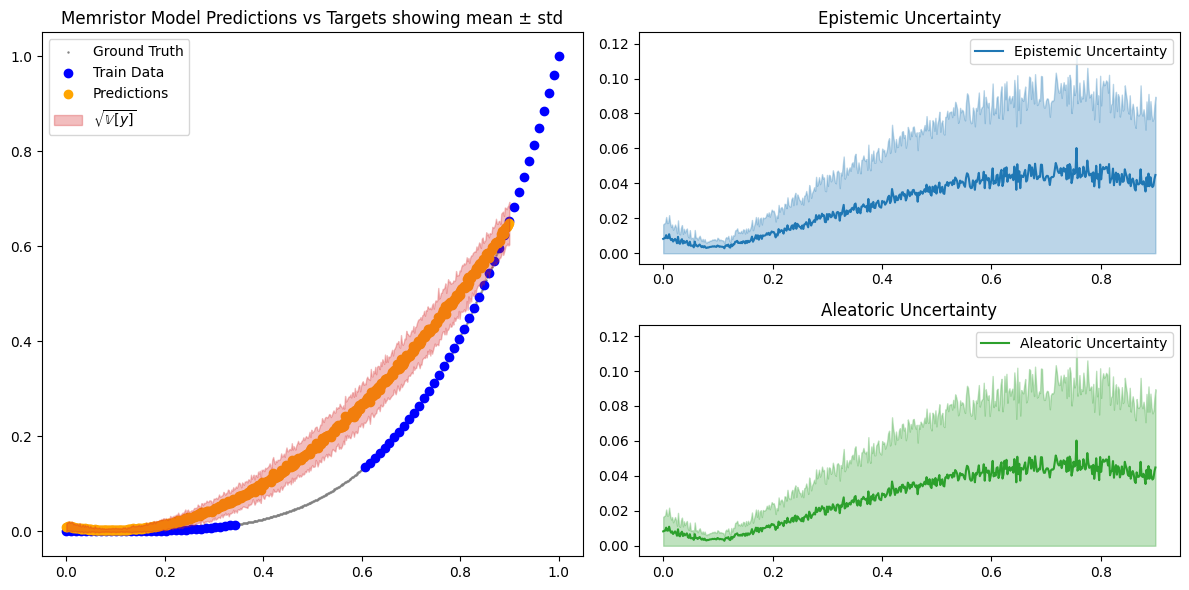

In [9]:
# Plotting the results
plot_predictions(
    X_train.numpy(), y_train.numpy(), X_test.numpy(), y_test.numpy(),
    predictions, pred_std=predictive_uncertainty, epistemic=predictive_uncertainty,
    aleatoric=predictive_uncertainty, title="Memristor Model Predictions vs Targets"
)

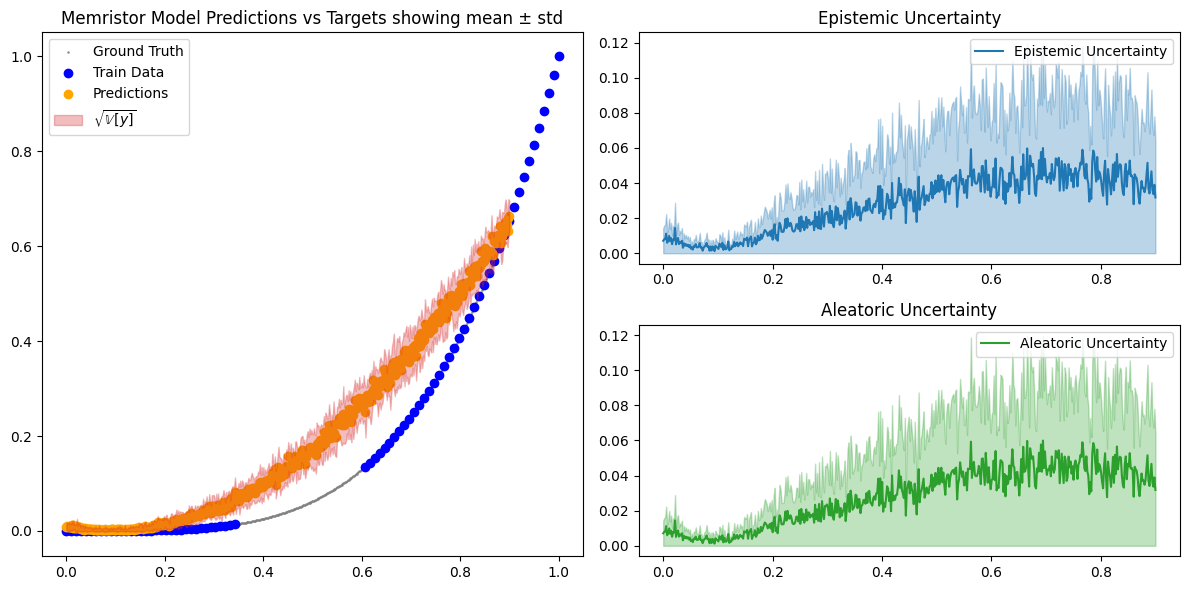

In [5]:
# Plotting the results
plot_predictions(
    X_train.numpy(), y_train.numpy(), X_test.numpy(), y_test.numpy(),
    predictions, pred_std=predictive_uncertainty, epistemic=predictive_uncertainty,
    aleatoric=predictive_uncertainty, title="Memristor Model Predictions vs Targets"
)